<a href="https://colab.research.google.com/github/armandossrecife/lp2024-1/blob/main/analise_alugueis_rj_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados de alugueis (Rio de Janeiro - 2020)

In [ ]:
import pandas as pd

## Importando os dados

In [ ]:
!rm -rf *.csv
!rm -rf *.xlsx

In [ ]:
!wget https://raw.githubusercontent.com/armandossrecife/lp20232/main/aluguel.csv

--2024-05-16 17:03:15--  https://raw.githubusercontent.com/armandossrecife/lp20232/main/aluguel.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1396187 (1.3M) [text/plain]
Saving to: ‘aluguel.csv’

aluguel.csv         100%[===================>]   1.33M  --.-KB/s    in 0.06s   

2024-05-16 17:03:15 (20.6 MB/s) - ‘aluguel.csv’ saved [1396187/1396187]



In [ ]:
!wget https://raw.githubusercontent.com/armandossrecife/lp20232/main/aluguel.xlsx

--2024-05-16 17:03:15--  https://raw.githubusercontent.com/armandossrecife/lp20232/main/aluguel.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10504 (10K) [application/octet-stream]
Saving to: ‘aluguel.xlsx’

aluguel.xlsx        100%[===================>]  10.26K  --.-KB/s    in 0s      

2024-05-16 17:03:15 (76.6 MB/s) - ‘aluguel.xlsx’ saved [10504/10504]



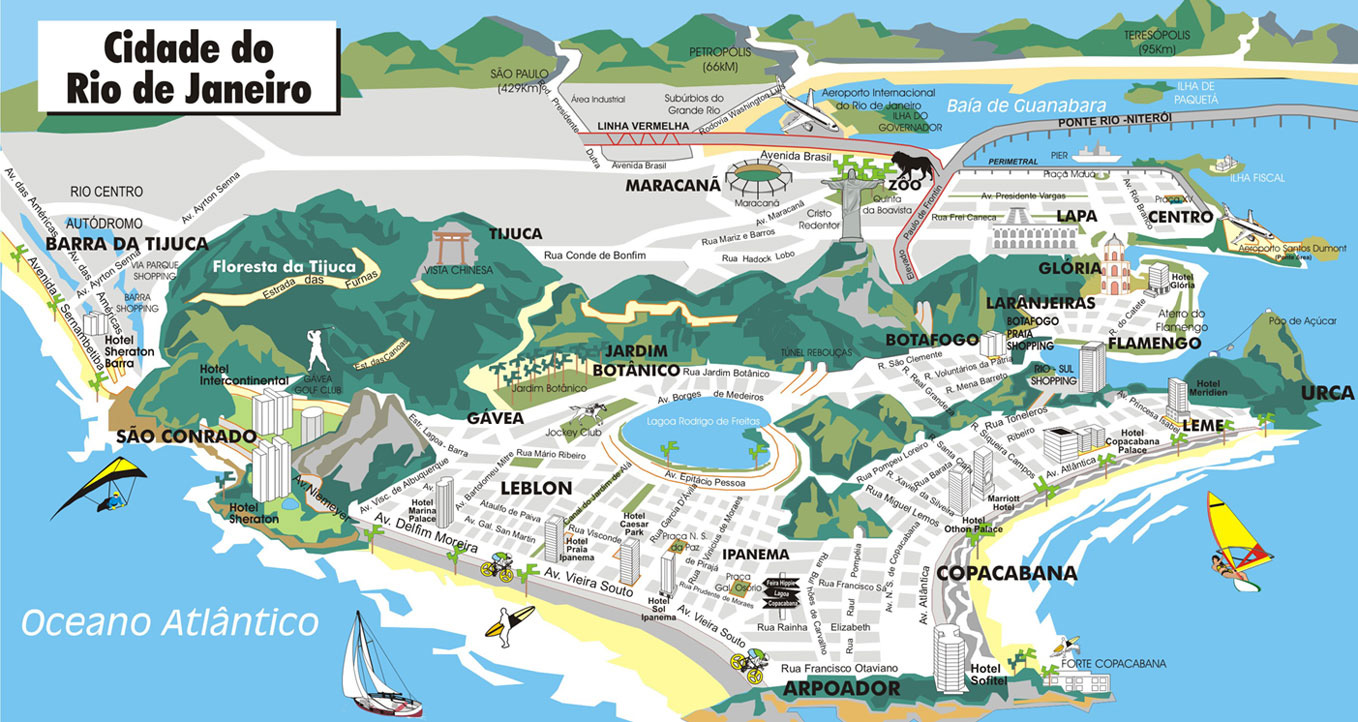

## Criando o dataframe a partir do arquivo de dados

CSV (Coma Separated Value)

https://en.wikipedia.org/wiki/Comma-separated_values

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [ ]:
df_aluguel = pd.read_csv('aluguel.csv', sep=';')
df_aluguel

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


Lendo de arquivo Excel (.xls)

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

In [ ]:
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19831 entries, 0 to 19830
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           19831 non-null  object 
 1   Bairro         19831 non-null  object 
 2   Quartos        19831 non-null  int64  
 3   Vagas          19831 non-null  int64  
 4   Suites         19831 non-null  int64  
 5   Area           19831 non-null  int64  
 6   Valor          19831 non-null  float64
 7   Condominio     19831 non-null  float64
 8   IPTU           19831 non-null  float64
 9   Valor m2       19831 non-null  float64
 10  Tipo Agregado  19831 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 1.7+ MB


### Tratamento das colunas com valores NaN (Nulos)

https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
https://pandas.pydata.org/docs/reference/api/pandas.notna.html#pandas.notna

In [ ]:
# Checa os valores "ausentes"
valor_null = df_aluguel['Valor'].isnull()
condominio_null = df_aluguel['Condominio'].isnull()
iptu_null = df_aluguel['IPTU'].isnull()

In [ ]:
len(df_aluguel[valor_null])

0

In [ ]:
df_aluguel.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU', 'Valor m2', 'Tipo Agregado'],
      dtype='object')

Desconsidera as colunas condominio e IPTU (Foco: valor de aluguel)

In [ ]:
df_aluguel_valido = df_aluguel[['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor']]
df_aluguel_valido

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
0,Apartamento,Centro,1,0,0,15,800.0
1,Apartamento,Higienópolis,1,0,0,48,800.0
2,Apartamento,Cachambi,2,0,0,50,1300.0
3,Apartamento,Grajaú,2,1,0,70,1500.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0
...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0
19827,Quitinete,Flamengo,1,0,0,23,900.0
19828,Quitinete,Centro,1,0,0,24,1100.0
19829,Quitinete,Copacabana,1,0,0,22,1500.0


Remove os registros que não possuem valor de aluguel

In [ ]:
valor_null = df_aluguel_valido['Valor'].isnull()

In [ ]:
df_aluguel_valido[valor_null]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor


Pega os índices dos registros que não tem valor

In [ ]:
df_aluguel_valido[valor_null].index

Index([], dtype='int64')

Remove os registros com valor NaN

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

Obs:

axis=0 para se referir as colunas

axis=1 para se referir as linhas (registros)


In [ ]:
df_aluguel_valido = df_aluguel_valido.drop(axis=1, index=df_aluguel_valido[valor_null].index)
df_aluguel_valido

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
0,Apartamento,Centro,1,0,0,15,800.0
1,Apartamento,Higienópolis,1,0,0,48,800.0
2,Apartamento,Cachambi,2,0,0,50,1300.0
3,Apartamento,Grajaú,2,1,0,70,1500.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0
...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0
19827,Quitinete,Flamengo,1,0,0,23,900.0
19828,Quitinete,Centro,1,0,0,24,1100.0
19829,Quitinete,Copacabana,1,0,0,22,1500.0


In [ ]:
df_aluguel_valido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19831 entries, 0 to 19830
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tipo     19831 non-null  object 
 1   Bairro   19831 non-null  object 
 2   Quartos  19831 non-null  int64  
 3   Vagas    19831 non-null  int64  
 4   Suites   19831 non-null  int64  
 5   Area     19831 non-null  int64  
 6   Valor    19831 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.1+ MB


## Informações básicas sobre o dataset de alugueis

### Análise de correlação entre as colunas

Correlação entre variáveis de um dataset

https://en.wikipedia.org/wiki/Correlation

Coeficiente de Pearson

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Interpretando o coeficiente de Pearson

- 0.9 para mais ou para menos indica uma correlação muito forte.
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
- 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

Usando a biblioteca seaborn para análise rica de estatística

https://seaborn.pydata.org


In [ ]:
colunas_numericas = ['Quartos',	'Vagas',	'Suites',	'Area',	'Valor']

In [ ]:
df_aluguel_valido[colunas_numericas].corr()

,Quartos,Vagas,Suites,Area,Valor
Quartos,1.000000,0.043624,0.617179,0.669422,0.616408
Vagas,0.043624,1.000000,0.043032,0.048624,0.040426
Suites,0.617179,0.043032,1.000000,0.656047,0.635407
Area,0.669422,0.048624,0.656047,1.000000,0.800900
Valor,0.616408,0.040426,0.635407,0.800900,1.000000


<Axes: >

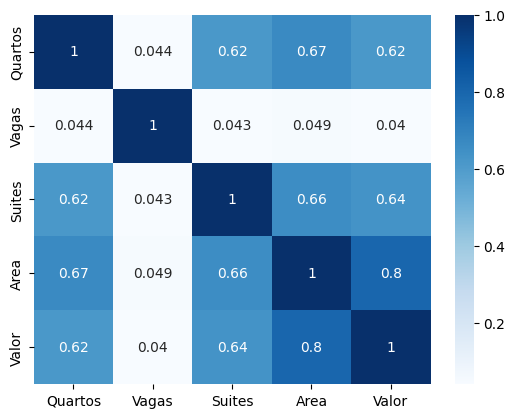

In [ ]:
import seaborn as sb

corr = df_aluguel_valido[colunas_numericas].corr()
sb.heatmap(corr, cmap="Blues", annot=True)

### Quais são os tipos de imóveis disponíveis?

unique()

https://pandas.pydata.org/docs/reference/api/pandas.unique.html

In [ ]:
df_aluguel_valido['Tipo'].unique()

array(['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila',
       'Quitinete'], dtype=object)

In [ ]:
type(df_aluguel_valido['Tipo'].unique())

numpy.ndarray

In [ ]:
lista_tipos_imoveis = df_aluguel_valido['Tipo'].unique().tolist()
lista_tipos_imoveis

['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila', 'Quitinete']

### Quais são os bairros disponíveis?

In [ ]:
df_aluguel_valido['Bairro'].unique()

array(['Centro', 'Higienópolis', 'Cachambi', 'Grajaú',
       'Lins de Vasconcelos', 'Copacabana', 'Freguesia (Jacarepaguá)',
       'Barra da Tijuca', 'Tijuca', 'Olaria', 'Ipanema', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'Jardim Botânico', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Catete', 'Jardim Carioca', 'Praça Seca', 'Vila Isabel', 'Lagoa',
       'Taquara', 'Engenho Novo', 'Campo Grande', 'Flamengo',
       'Engenho de Dentro', 'Pilares', 'Água Santa', 'São Cristóvão',
       'Ilha do Governador', 'Vila da Penha', 'Anil', 'Vaz Lobo',
       'Madureira', 'São Francisco Xavier', 'Pechincha', 'Leme', 'Irajá',
       'Urca', 'Penha', 'São Conrado', 'Rio Comprido', 'Andaraí',
       'Quintino Bocaiúva', 'Inhaúma', 'Glória', 'Marechal Hermes',
       'Curicica', 'Moneró', 'Santa Teresa', 'Camorim'

In [ ]:
len(df_aluguel_valido['Bairro'].unique())

151

### Quais são os valores mínimo e máximo dos alugueis válidos?

In [ ]:
df_aluguel_valido['Valor'].min()

100.0

In [ ]:
df_aluguel_valido['Valor'].max()

32000.0

Analisar os valores que sejam muito altos. (Talvez precise remover da base de alugueis)

In [ ]:
df_aluguel_valido.query("Valor >= 100000")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor


### Informações de Apartamentos

In [ ]:
df_aluguel_apartamentos = df_aluguel_valido.query("Tipo == 'Apartamento'")
df_aluguel_apartamentos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
0,Apartamento,Centro,1,0,0,15,800.0
1,Apartamento,Higienópolis,1,0,0,48,800.0
2,Apartamento,Cachambi,2,0,0,50,1300.0
3,Apartamento,Grajaú,2,1,0,70,1500.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0
...,...,...,...,...,...,...,...
16918,Apartamento,Vila Valqueire,2,0,0,52,1000.0
16919,Apartamento,Méier,2,0,0,70,900.0
16920,Apartamento,Jacarepaguá,3,1,2,78,1800.0
16921,Apartamento,São Francisco Xavier,2,1,0,48,1400.0


Qual o valor médio, min e max dos apartamentos?

In [ ]:
df_aluguel_apartamentos.Valor.mean()

3141.1798735448797

In [ ]:
round(df_aluguel_apartamentos.Valor.mean(), 2)

3141.18

In [ ]:
df_aluguel_apartamentos.Valor.min()

100.0

In [ ]:
apartamento_aluguel_min = df_aluguel_apartamentos.Valor.min()
consulta_min = f"Valor == {apartamento_aluguel_min}"
df_aluguel_apartamentos.query(consulta_min)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
11120,Apartamento,Leblon,0,0,0,15,100.0


In [ ]:
df_aluguel_apartamentos.Valor.max()

9900.0

In [ ]:
apartamento_aluguel_max = df_aluguel_apartamentos.Valor.max()
consulta_max = f"Valor == {apartamento_aluguel_max}"
df_aluguel_apartamentos.query(consulta_max)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
3728,Apartamento,Leblon,3,1,2,150,9900.0
3821,Apartamento,Ipanema,3,2,1,200,9900.0
5669,Apartamento,Ipanema,3,1,2,250,9900.0
6902,Apartamento,Copacabana,2,1,1,204,9900.0
11489,Apartamento,Lagoa,3,2,1,145,9900.0
11785,Apartamento,Leblon,3,2,2,150,9900.0
12389,Apartamento,Leblon,3,2,2,157,9900.0
14235,Apartamento,Barra da Tijuca,4,3,3,179,9900.0
14421,Apartamento,Copacabana,2,1,1,200,9900.0
15162,Apartamento,Ipanema,3,2,2,170,9900.0


Apartamentos por Bairro

value_counts()

https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

In [ ]:
df_aluguel_apartamentos['Bairro'].value_counts()

Bairro
Barra da Tijuca             2839
Copacabana                  2166
Recreio dos Bandeirantes    1458
Ipanema                     1200
Tijuca                      1046
                            ... 
Saúde                          1
Jardim América                 1
Cavalcanti                     1
Coelho Neto                    1
Magalhães Bastos               1
Name: count, Length: 143, dtype: int64

In [ ]:
s_apartamentos_por_bairro = df_aluguel_apartamentos['Bairro'].value_counts()
s_apartamentos_por_bairro

Bairro
Barra da Tijuca             2839
Copacabana                  2166
Recreio dos Bandeirantes    1458
Ipanema                     1200
Tijuca                      1046
                            ... 
Saúde                          1
Jardim América                 1
Cavalcanti                     1
Coelho Neto                    1
Magalhães Bastos               1
Name: count, Length: 143, dtype: int64

In [ ]:
s_apartamentos_por_bairro['Copacabana']

2166

In [ ]:
s_apartamentos_por_bairro.index

Index(['Barra da Tijuca', 'Copacabana', 'Recreio dos Bandeirantes', 'Ipanema',
       'Tijuca', 'Leblon', 'Botafogo', 'Flamengo', 'Freguesia (Jacarepaguá)',
       'Laranjeiras',
       ...
       'Jacaré', 'Vigário Geral', 'Pitangueiras', 'Caju', 'Anchieta', 'Saúde',
       'Jardim América', 'Cavalcanti', 'Coelho Neto', 'Magalhães Bastos'],
      dtype='object', name='Bairro', length=143)

In [ ]:
# Quantidade de apartamentos no Bairro de Copacabana
s_apartamentos_por_bairro['Copacabana']

2166

In [ ]:
for i in range(len(s_apartamentos_por_bairro)):
  bairro = s_apartamentos_por_bairro.index[i]
  qtd_apartamentos = s_apartamentos_por_bairro[bairro]
  print(f"Bairro: {bairro}: {qtd_apartamentos}")

Bairro: Barra da Tijuca: 2839
Bairro: Copacabana: 2166
Bairro: Recreio dos Bandeirantes: 1458
Bairro: Ipanema: 1200
Bairro: Tijuca: 1046
Bairro: Leblon: 862
Bairro: Botafogo: 753
Bairro: Flamengo: 580
Bairro: Freguesia (Jacarepaguá): 391
Bairro: Laranjeiras: 381
Bairro: Lagoa: 368
Bairro: Vila Isabel: 273
Bairro: Campo Grande: 235
Bairro: Méier: 227
Bairro: Jacarepaguá: 223
Bairro: Leme: 206
Bairro: Centro: 199
Bairro: Jardim Botânico: 188
Bairro: Pechincha: 182
Bairro: Gávea: 176
Bairro: São Conrado: 159
Bairro: Humaitá: 147
Bairro: Grajaú: 134
Bairro: Cachambi: 125
Bairro: Taquara: 121
Bairro: Maracanã: 116
Bairro: Catete: 115
Bairro: Engenho Novo: 94
Bairro: Andaraí: 91
Bairro: Santa Teresa: 80
Bairro: Glória: 74
Bairro: Rio Comprido: 73
Bairro: Praça Seca: 72
Bairro: Vila da Penha: 72
Bairro: Engenho de Dentro: 61
Bairro: Jardim Guanabara: 60
Bairro: Curicica: 59
Bairro: Irajá: 57
Bairro: São Cristóvão: 55
Bairro: Anil: 51
Bairro: Urca: 50
Bairro: Bonsucesso: 48
Bairro: Todos os Sa

### Convertendo uma serie em dataframe

Usando um dicionário

In [ ]:
s_apartamentos_por_bairro.values.tolist()

[2839,
 2166,
 1458,
 1200,
 1046,
 862,
 753,
 580,
 391,
 381,
 368,
 273,
 235,
 227,
 223,
 206,
 199,
 188,
 182,
 176,
 159,
 147,
 134,
 125,
 121,
 116,
 115,
 94,
 91,
 80,
 74,
 73,
 72,
 72,
 61,
 60,
 59,
 57,
 55,
 51,
 50,
 48,
 45,
 40,
 40,
 39,
 35,
 34,
 31,
 29,
 29,
 27,
 25,
 25,
 24,
 21,
 21,
 21,
 21,
 21,
 20,
 19,
 17,
 16,
 16,
 16,
 15,
 14,
 14,
 13,
 12,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
s_apartamentos_por_bairro.index.tolist()

['Barra da Tijuca',
 'Copacabana',
 'Recreio dos Bandeirantes',
 'Ipanema',
 'Tijuca',
 'Leblon',
 'Botafogo',
 'Flamengo',
 'Freguesia (Jacarepaguá)',
 'Laranjeiras',
 'Lagoa',
 'Vila Isabel',
 'Campo Grande',
 'Méier',
 'Jacarepaguá',
 'Leme',
 'Centro',
 'Jardim Botânico',
 'Pechincha',
 'Gávea',
 'São Conrado',
 'Humaitá',
 'Grajaú',
 'Cachambi',
 'Taquara',
 'Maracanã',
 'Catete',
 'Engenho Novo',
 'Andaraí',
 'Santa Teresa',
 'Glória',
 'Rio Comprido',
 'Praça Seca',
 'Vila da Penha',
 'Engenho de Dentro',
 'Jardim Guanabara',
 'Curicica',
 'Irajá',
 'São Cristóvão',
 'Anil',
 'Urca',
 'Bonsucesso',
 'Todos os Santos',
 'Lins de Vasconcelos',
 'Camorim',
 'Praça da Bandeira',
 'Madureira',
 'Vila Valqueire',
 'Península',
 'Penha',
 'Riachuelo',
 'São Francisco Xavier',
 'Olaria',
 'Cosme Velho',
 'Vargem Pequena',
 'Ilha do Governador',
 'Del Castilho',
 'Tanque',
 'Lapa',
 'Cascadura',
 'Estácio',
 'Itanhangá',
 'Rocha',
 'Piedade',
 'Quintino Bocaiúva',
 'Jardim Oceânico',
 'V

In [ ]:
dict_apartamentos_por_bairro = {
    'bairro': s_apartamentos_por_bairro.index.tolist(),
    'qtd_apartamentos': s_apartamentos_por_bairro.values.tolist()
}

dict_apartamentos_por_bairro

{'bairro': ['Barra da Tijuca',
  'Copacabana',
  'Recreio dos Bandeirantes',
  'Ipanema',
  'Tijuca',
  'Leblon',
  'Botafogo',
  'Flamengo',
  'Freguesia (Jacarepaguá)',
  'Laranjeiras',
  'Lagoa',
  'Vila Isabel',
  'Campo Grande',
  'Méier',
  'Jacarepaguá',
  'Leme',
  'Centro',
  'Jardim Botânico',
  'Pechincha',
  'Gávea',
  'São Conrado',
  'Humaitá',
  'Grajaú',
  'Cachambi',
  'Taquara',
  'Maracanã',
  'Catete',
  'Engenho Novo',
  'Andaraí',
  'Santa Teresa',
  'Glória',
  'Rio Comprido',
  'Praça Seca',
  'Vila da Penha',
  'Engenho de Dentro',
  'Jardim Guanabara',
  'Curicica',
  'Irajá',
  'São Cristóvão',
  'Anil',
  'Urca',
  'Bonsucesso',
  'Todos os Santos',
  'Lins de Vasconcelos',
  'Camorim',
  'Praça da Bandeira',
  'Madureira',
  'Vila Valqueire',
  'Península',
  'Penha',
  'Riachuelo',
  'São Francisco Xavier',
  'Olaria',
  'Cosme Velho',
  'Vargem Pequena',
  'Ilha do Governador',
  'Del Castilho',
  'Tanque',
  'Lapa',
  'Cascadura',
  'Estácio',
  'Itanhan

In [ ]:
df_qtd_ap_por_bairro = pd.DataFrame(dict_apartamentos_por_bairro)
df_qtd_ap_por_bairro

,bairro,qtd_apartamentos
0,Barra da Tijuca,2839
1,Copacabana,2166
2,Recreio dos Bandeirantes,1458
3,Ipanema,1200
4,Tijuca,1046
...,...,...
138,Saúde,1
139,Jardim América,1
140,Cavalcanti,1
141,Coelho Neto,1


Conversão direta

In [ ]:
df_qtd_ap_por_bairro_simples = s_apartamentos_por_bairro.to_frame()
df_qtd_ap_por_bairro_simples

,count
Bairro,
Barra da Tijuca,2839
Copacabana,2166
Recreio dos Bandeirantes,1458
Ipanema,1200
Tijuca,1046
...,...
Saúde,1
Jardim América,1
Cavalcanti,1


In [ ]:
df_qtd_ap_por_bairro_simples['count']['Barra da Tijuca']

2839

In [ ]:
df_qtd_ap_por_bairro_simples.sort_values(by='Bairro', ascending=False)

,count
Bairro,
Água Santa,7
Zumbi,2
Vista Alegre,13
Vila da Penha,72
Vila Valqueire,34
...,...
Anil,51
Andaraí,91
Anchieta,1


### Calculando o valor médio dos aluguéis agrupado por bairros

O valor médio dos apartamentos **agrupados** por bairro

**groupby**: retorna um objeto GroupBy, agrupado por valores na coluna denominada "col".

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [ ]:
df_aluguel_apartamentos[['Bairro', 'Valor']].sort_values(['Bairro'])

,Bairro,Valor
15606,Abolição,800.0
5370,Abolição,1300.0
5902,Abolição,1000.0
14575,Abolição,900.0
11004,Abolição,800.0
...,...,...
10690,Água Santa,950.0
10461,Água Santa,850.0
11009,Água Santa,800.0
150,Água Santa,850.0


In [ ]:
df_aluguel_apartamentos[['Bairro', 'Valor']].groupby(['Bairro'])

In [ ]:
df_aluguel_apartamentos[['Bairro', 'Valor']].groupby(['Bairro']).mean()

,Valor
Bairro,
Abolição,994.444444
Alto da Boa Vista,1483.333333
Anchieta,850.000000
Andaraí,1420.296703
Anil,1517.450980
...,...
Vila Valqueire,1500.294118
Vila da Penha,1195.694444
Vista Alegre,1125.384615


In [ ]:
df_valor_medio_aluguel_por_bairro = df_aluguel_apartamentos[['Bairro', 'Valor']].groupby(['Bairro']).mean()
df_valor_medio_aluguel_por_bairro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, Abolição to Água Santa
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Valor   143 non-null    float64
dtypes: float64(1)
memory usage: 2.2+ KB


In [ ]:
df_aluguel_apartamentos[['Bairro', 'Valor']].groupby(['Bairro']).mean().applymap('{:.2f}'.format)

,Valor
Bairro,
Abolição,994.44
Alto da Boa Vista,1483.33
Anchieta,850.00
Andaraí,1420.30
Anil,1517.45
...,...
Vila Valqueire,1500.29
Vila da Penha,1195.69
Vista Alegre,1125.38


In [ ]:
df_valor_medio_aluguel_por_bairro.index

Index(['Abolição', 'Alto da Boa Vista', 'Anchieta', 'Andaraí', 'Anil',
       'Arpoador', 'Bancários', 'Bangu', 'Barra da Tijuca',
       'Barra de Guaratiba',
       ...
       'Vicente de Carvalho', 'Vidigal', 'Vigário Geral', 'Vila Isabel',
       'Vila Kosmos', 'Vila Valqueire', 'Vila da Penha', 'Vista Alegre',
       'Zumbi', 'Água Santa'],
      dtype='object', name='Bairro', length=143)

In [ ]:
type(df_valor_medio_aluguel_por_bairro['Valor'])

pandas.core.series.Series

In [ ]:
df_valor_medio_aluguel_por_bairro['Valor']['Barra da Tijuca']

3832.063402606552

In [ ]:
try:
  bairro = input('Qual o bairro? ')
  if bairro not in df_valor_medio_aluguel_por_bairro.index.tolist():
    raise ValueError('Bairro não existe')
  print(df_valor_medio_aluguel_por_bairro['Valor'][bairro])
except ValueError as ve:
  print(str(ve))

Qual o bairro? Barra da Tijuca
3832.063402606552


In [ ]:
df_valor_medio_aluguel_por_bairro.loc['Leblon']

Valor    5554.064965
Name: Leblon, dtype: float64

In [ ]:
df_valor_medio_aluguel_por_bairro.loc['Copacabana']

Valor    3596.480148
Name: Copacabana, dtype: float64

In [ ]:
df_valor_medio_aluguel_por_bairro.loc['Barra da Tijuca']

Valor    3832.063403
Name: Barra da Tijuca, dtype: float64

In [ ]:
df_aluguel_apartamentos.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
0,Apartamento,Centro,1,0,0,15,800.0
1,Apartamento,Higienópolis,1,0,0,48,800.0
2,Apartamento,Cachambi,2,0,0,50,1300.0


Quais os apartamentos do Bairro Barra da Tijuca, com 3 quartos que custam até R$ 3.000,00 de aluguel?

In [ ]:
bairro='Barra da Tijuca'
quartos=3
valor=3000

In [ ]:
consulta_apartamento = f"Bairro == '{bairro}' and Quartos=={quartos} and Valor<={valor}"
df_aluguel_apartamentos.query(consulta_apartamento)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
19,Apartamento,Barra da Tijuca,3,1,2,70,1800.0
24,Apartamento,Barra da Tijuca,3,1,1,72,2350.0
44,Apartamento,Barra da Tijuca,3,2,1,104,2600.0
51,Apartamento,Barra da Tijuca,3,2,2,85,2500.0
81,Apartamento,Barra da Tijuca,3,2,1,128,3000.0
...,...,...,...,...,...,...,...
16329,Apartamento,Barra da Tijuca,3,1,1,87,1600.0
16609,Apartamento,Barra da Tijuca,3,2,1,120,2900.0
16692,Apartamento,Barra da Tijuca,3,1,1,62,1600.0
16787,Apartamento,Barra da Tijuca,3,2,1,85,2500.0


Qual a distribuição de frequência dos valores de aluguel dos apartamentos da Barra da Tijuca variando até R$ 3.000,00?

<Axes: >

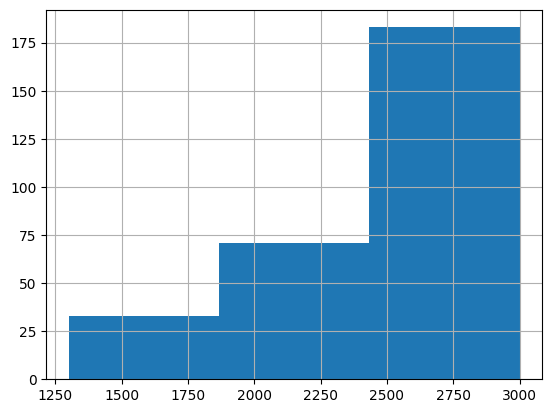

In [ ]:
df_aluguel_apartamentos.query(consulta_apartamento)['Valor'].hist(bins=3)

In [ ]:
df_aluguel_apartamentos.query(consulta_apartamento).query("Valor >= 2500")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
44,Apartamento,Barra da Tijuca,3,2,1,104,2600.0
51,Apartamento,Barra da Tijuca,3,2,2,85,2500.0
81,Apartamento,Barra da Tijuca,3,2,1,128,3000.0
98,Apartamento,Barra da Tijuca,3,1,2,93,2500.0
167,Apartamento,Barra da Tijuca,3,1,1,105,2500.0
...,...,...,...,...,...,...,...
16114,Apartamento,Barra da Tijuca,3,2,1,110,2800.0
16154,Apartamento,Barra da Tijuca,3,2,1,141,3000.0
16265,Apartamento,Barra da Tijuca,3,2,1,100,3000.0
16609,Apartamento,Barra da Tijuca,3,2,1,120,2900.0


In [ ]:
df_aluguel_apartamentos.query(consulta_apartamento).query("Valor >= 2500 and Vagas==1 and Suites==1")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
167,Apartamento,Barra da Tijuca,3,1,1,105,2500.0
726,Apartamento,Barra da Tijuca,3,1,1,90,2850.0
925,Apartamento,Barra da Tijuca,3,1,1,103,2600.0
1385,Apartamento,Barra da Tijuca,3,1,1,92,2500.0
1520,Apartamento,Barra da Tijuca,3,1,1,104,3000.0
1527,Apartamento,Barra da Tijuca,3,1,1,102,2500.0
2012,Apartamento,Barra da Tijuca,3,1,1,100,2800.0
3457,Apartamento,Barra da Tijuca,3,1,1,93,3000.0
3920,Apartamento,Barra da Tijuca,3,1,1,105,2500.0
4034,Apartamento,Barra da Tijuca,3,1,1,82,2500.0


Faça uma comparação (apartamentos na Barra da Tijuca) dos preços desta base de dados com o site 5o. Andar (https://www.quintoandar.com.br/)